# Анализ данных, собранных из постов публичного сообщества в социальной сети ВКонтакте "На дорогах Магнитки! (Магнитогорск)", ссылка на сообщество в ВК: https://vk.com/auto_mgn

# Монтируем гугл диск

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Устанаваливаем библиотеку vk_api

In [ ]:
!pip install vk_api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.7 MB/s eta 0:00:00


#2. Импортируем необходимые библиотеки

In [ ]:
import vk_api
import pandas as pd

#3. Соединение с VK API

In [ ]:
# Чтение токена из файла
token_file_path = '/content/drive/MyDrive/Datasets/auth_vk_token.txt'
with open(token_file_path, 'r') as file:
    token = file.read().strip()

vk_session = vk_api.VkApi(token = token)
vk = vk_session.get_api()

#4. Запрос на получение всех постов сообщества, офомление полученного результата в виде DataFrame и сохранение датафрейма в формате .csv

In [ ]:
# ID сообщества
group_id = 'auto_mgn'

# Получение информации о количестве постов в сообществе
response = vk.wall.get(domain=group_id, count=1)
response

{'count': 79454,
 'items': [{'inner_type': 'wall_wallpost',
   'ads_easy_promote': {'type': 2,
    'text': 'Что-то пошло не так.',
    'label_text': '',
    'button_text': '',
    'is_ad_not_easy': False},
   'is_pinned': 1,
   'comments': {'can_post': 0, 'count': 0},
   'marked_as_ads': 1,
   'marked_as_author_ad': True,
   'hash': 'dalRaijOqoj0p2pkFtC9fTCKfGeN',
   'type': 'post',
   'donut_miniapp_url': 'https://vk.com/app51528700#/?owner_id=-49177878&no_badges=1&post_id=3467863',
   'attachments': [{'type': 'video',
     'video': {'response_type': 'full',
      'access_key': '2c0f46455236c0f6b0',
      'can_comment': 1,
      'can_like': 1,
      'can_repost': 1,
      'can_subscribe': 1,
      'can_add_to_faves': 1,
      'can_add': 1,
      'comments': 0,
      'date': 1711788395,
      'description': '',
      'duration': 16,
      'photo_130': 'https://i.mycdn.me/getVideoPreview?id=6514652547792&idx=8&type=39&tkn=arEt5eUxfvyZbofYPlZ3o_NW6nY&fn=vid_s',
      'photo_320': 'https:

In [ ]:
total_posts_count = response['count']
print("Общее количество постов в сообществе за всё время:", total_posts_count)

Общее количество постов в сообществе за всё время: 79454


In [ ]:
# Количество постов, которые нужно получить за один запрос
count_per_request = 100

# Начальное смещение
offset = 0

# Создание списка для хранения данных постов
posts_data = []

# Получение всех постов из сообщества
while True:
    response = vk.wall.get(domain=group_id, count=count_per_request, offset=offset, extended=1)
    posts = response['items']

    # Если нет больше постов, выходим из цикла
    if not posts:
        break

    # Добавление данных постов в список
    for post in posts:
        post_data = {
            'post_id': post['id'],
            'date': post['date'],
            'text': post['text'],
            'likes_count': post['likes']['count'],
            'comments_count': post['comments']['count'],
            'reposts_count': post['reposts']['count'],
            'views_count': post['views']['count'] if 'views' in post else 0
            # Можно добавить другие поля, если они вам нужны
        }
        posts_data.append(post_data)

    # Увеличение смещения для следующего запроса
    offset += count_per_request

    # Вывод сообщения о прогрессе после каждой 1000 записи
    if offset % 1000 == 0:
        print(f"Собрано {offset} постов")

# Создание DataFrame из списка данных постов
df = pd.DataFrame(posts_data)

# Сохранение данных в CSV файл
df.to_csv('/content/drive/MyDrive/Datasets/auto_mgn_posts.csv', index=False)

# Вывод сообщения о завершении
print("Все посты собраны и сохранены в CSV файл.")

Собрано 1000 постов
Собрано 2000 постов
Собрано 3000 постов
Собрано 4000 постов
Собрано 5000 постов
Собрано 6000 постов
Собрано 7000 постов
Собрано 8000 постов
Собрано 9000 постов
Собрано 10000 постов
Собрано 11000 постов
Собрано 12000 постов
Собрано 13000 постов
Собрано 14000 постов
Собрано 15000 постов
Собрано 16000 постов
Собрано 17000 постов
Собрано 18000 постов
Собрано 19000 постов
Собрано 20000 постов
Собрано 21000 постов
Собрано 22000 постов
Собрано 23000 постов
Собрано 24000 постов
Собрано 25000 постов
Собрано 26000 постов
Собрано 27000 постов
Собрано 28000 постов
Собрано 29000 постов
Собрано 30000 постов
Собрано 31000 постов
Собрано 32000 постов
Собрано 33000 постов
Собрано 34000 постов
Собрано 35000 постов
Собрано 36000 постов
Собрано 37000 постов
Собрано 38000 постов
Собрано 39000 постов
Собрано 40000 постов
Собрано 41000 постов
Собрано 42000 постов
Собрано 43000 постов
Собрано 44000 постов
Собрано 45000 постов
Собрано 46000 постов
Собрано 47000 постов
Собрано 48000 постов
С

#5. Чтение и вывод полученного датасета на экран

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/auto_mgn_posts.csv')
data

,post_id,date,text,likes_count,comments_count,reposts_count,views_count
0,3467730,1711778402,[club221354013|Заказ Авто из Кореи и Японии в ...,1,0,1,3081
1,3467679,1711774500,"Пожалуйста, анонимно.\n\nУважаемые сограждане,...",363,27,322,19065
2,3467675,1711774092,Водители будьте внимательны! Опасная яма на ул...,47,10,23,10769
3,3467656,1711771201,[club213086911|Центр проблемной стопы Podospec...,2,0,2,6179
4,3467648,1711769940,"Анонимно пожалуйста. Жуково 12, 2 подъезд, мин...",53,11,4,12352
...,...,...,...,...,...,...,...
79428,7,1360086748,"г.Магнитогорск ул.Советская, выезд с кругового...",14,0,2,0
79429,5,1359907280,Авария на пер.Советском в Магнитогорске! Смотр...,23,0,5,0
79430,4,1359825857,25.01.2012 Через 45 минут после первой аварии:,5,0,3,0
79431,3,1359825651,ДТП на Цирке 25.01.2013,12,0,3,0


# 6. Импорт библиотеки natasha для извлечения NER (связанных сущностей) из текстовых данных

In [ ]:
!pip install natasha

## Вывод текстового содержимого одного поста из набора данных в качестве примера

In [ ]:
post_id = 3467447
post = data[data['post_id'] == post_id]
print(post['text'].values[0])

👮‍♂️СЛЕДСТВЕННЫМ ОТДЕЛОМ ВОЗБУЖДЕНО УГОЛОВНОЕ ДЕЛО.
В РЕЗУЛЬТАТЕ ДТП ПОСТРАДАЛИ МАМА И ЕЕ 10-ЛЕТНЯЯ ДОЧЬ. ДЕВОЧКЕ ПРИЧИНЁН ТЯЖКИЙ ВРЕД ЗДОРОВЬЮ. 

19 октября 2023 года около 08 часов 29 минут 38-летний водитель, управляя автомобилем «Хёндэ Крета», выезжая с прилегающей территории проезжей части межквартального проезда в районе дома №37 по ул. Ворошилова, отвлекшись от управления автомобилем, своевременно не заметил пешеходов, переходивших проезжую часть дороги в не установленном для перехода месте в зоне видимости перекрёстка справа налево по ходу движения автомобиля. Водитель, выполняя манёвр левого поворота, создавая опасность для движения пешеходов, не уступил им дорогу и на полосе встречного для своего направления движения совершил на них наезд. 
 
В результате ДТП пешеходам причинены телесные повреждения, женщине 1981 года рождения причинён вред здоровью средней тяжести, девочке 2011 года рождения причинён тяжкий вред здоровью. 
 
Своими действиями водитель автомобиля Хёндэ Крета 

## Выделение адреса (дома и улицы) из текстовых данных одного поста в качестве примера

In [ ]:
from natasha import (
    Segmenter,
    MorphVocab,
    LOC,
    AddrExtractor
)

# Initialize Natasha components
segmenter = Segmenter()
morph_vocab = MorphVocab()
extractor = AddrExtractor(morph_vocab)

# Extract addresses from text
matches = extractor(post['text'].values[0])

# Initialize lists to hold address parts
streets = []
houses = []

# Iterate over matches and categorize address parts
for match in matches:
    if match.fact.type == 'улица':
        streets.append(match.fact.value)
    elif match.fact.type == 'дом':
        houses.append(match.fact.value)

# Construct the sentence
address_sentence =   "дом " + "".join(houses) + ", улица " + "".join(streets)

# Print the constructed sentence
print(address_sentence)

дом №37, улица Ворошилова


# 7. Преобразование значения времени UNIX в столбце 'date' в дату

In [ ]:
data['date'] = pd.to_datetime(data['date'], unit='s')
data

,post_id,date,text,likes_count,comments_count,reposts_count,views_count
0,3467730,2024-03-30 06:00:02,[club221354013|Заказ Авто из Кореи и Японии в ...,1,0,1,3081
1,3467679,2024-03-30 04:55:00,"Пожалуйста, анонимно.\n\nУважаемые сограждане,...",363,27,322,19065
2,3467675,2024-03-30 04:48:12,Водители будьте внимательны! Опасная яма на ул...,47,10,23,10769
3,3467656,2024-03-30 04:00:01,[club213086911|Центр проблемной стопы Podospec...,2,0,2,6179
4,3467648,2024-03-30 03:39:00,"Анонимно пожалуйста. Жуково 12, 2 подъезд, мин...",53,11,4,12352
...,...,...,...,...,...,...,...
79428,7,2013-02-05 17:52:28,"г.Магнитогорск ул.Советская, выезд с кругового...",14,0,2,0
79429,5,2013-02-03 16:01:20,Авария на пер.Советском в Магнитогорске! Смотр...,23,0,5,0
79430,4,2013-02-02 17:24:17,25.01.2012 Через 45 минут после первой аварии:,5,0,3,0
79431,3,2013-02-02 17:20:51,ДТП на Цирке 25.01.2013,12,0,3,0


In [ ]:
# Находим минимальную и максимальную даты
min_date = data['date'].min()
max_date = data['date'].max()

# Вычисляем разницу в годах между минимальной и максимальной датами
years_collected = (max_date - min_date).days / 365.25

print(f"Данные собраны за {years_collected:.0f} лет")

Данные собраны за 11 лет


# 8. Делаем срез датафрейма по дате поста (в том числе ввиду отсутствия большого объёма оперативной памяти будем анализировать только свежие данные за 2023 и 2024 года)

In [ ]:
data = data[(data['date'].dt.year == 2023) | (data['date'].dt.year == 2024)]
data

,post_id,date,text,likes_count,comments_count,reposts_count,views_count
0,3467730,2024-03-30 06:00:02,[club221354013|Заказ Авто из Кореи и Японии в ...,1,0,1,3081
1,3467679,2024-03-30 04:55:00,"Пожалуйста, анонимно.\n\nУважаемые сограждане,...",363,27,322,19065
2,3467675,2024-03-30 04:48:12,Водители будьте внимательны! Опасная яма на ул...,47,10,23,10769
3,3467656,2024-03-30 04:00:01,[club213086911|Центр проблемной стопы Podospec...,2,0,2,6179
4,3467648,2024-03-30 03:39:00,"Анонимно пожалуйста. Жуково 12, 2 подъезд, мин...",53,11,4,12352
...,...,...,...,...,...,...,...
8647,3170417,2023-01-01 09:56:44,Максимальный репост. Кто потерял собаку породы...,63,10,12,21626
8648,3170398,2023-01-01 09:26:09,Парни дед мороз отзовитесь 89090978873,119,19,26,49119
8649,3170381,2023-01-01 08:50:38,29.12.22. В п. Измайловском был убит мой отец....,1110,149,213,77525
8650,3170380,2023-01-01 08:49:42,В районе ул.Строителей 49 найдены ключи от авт...,22,4,2,18520


# 9. Применяем библиотеку natasha для извлечения адресов (дома и улицы) из текстовых данных постов.

## Нас интересуют только те посты, где номер дома и название улицы встречаются ровно один раз, т.е. одному посту соответствует ровно один адрес, включающий в себя дом и улицу. Поэтому применяем следующую фильтрацию:
```python
if len(streets)==1 and len(houses)==1:
```

## Если данные не соответствуют критериям фильтрации, то в новый столбец датафрейма combined_address c адресом (дом и улица) записываем значение np.nan

In [ ]:
import numpy as np
from natasha import (
    Segmenter,
    MorphVocab,
    LOC,
    AddrExtractor
)

morph_vocab = MorphVocab()
extractor = AddrExtractor(morph_vocab)

# Проходим по всем постам в датафрейме
new_column_values = []
count = 0

for index, row in data.iterrows():
    text = row['text']
    if isinstance(text, str):
      matches = extractor(text)

      streets = []
      houses = []

      for match in matches:
          if match.fact.type == 'улица':
              streets.append(match.fact.value)
          elif match.fact.type == 'дом':
              houses.append(match.fact.value)

      if len(streets)==1 and len(houses)==1:
          address_sentence =   "дом " + "".join(houses) + ", улица " + ", ".join(streets)
          new_column_values.append(address_sentence)
          print(address_sentence)
      else:
          new_column_values.append(np.nan)

    else:
        new_column_values.append(np.nan)

    count += 1
    if count % 1000 == 0:
        print(f"{count} постов обработано")
# Добавляем новую колонку в датафрейм
data['combined_address'] = new_column_values

дом №37, улица Ворошилова
дом 108, улица Вокзальная
дом 14 и, улица Гагарина
дом 1, улица Полевая
дом 162, улица Советская
дом №92, улица Советская
дом №3, улица Локомотивной и
дом 12\1 в, улица Куйбышева
дом 51, улица Чайковского
дом №97, улица Суворова
дом 152, улица К.Маркса
дом 205а, улица Советская
1000 постов обработано
дом 193, улица Советская
дом 4, улица Ворошилова
дом 52, улица Центральная
дом 144-146, улица Суворова
дом 8, улица Сталеваров
дом №23, улица им. Газеты
дом №23, улица им. Газеты
дом 137 и, улица Советской
дом № 162а, улица Советской
дом №95, улица Лесопарковая
дом 193, улица Ворошилова
дом 31, улица Ворошилова
дом 6, улица Московская
дом №36, улица Лазника
дом 141, улица Советской
дом №72 и, улица Енисейская
2000 постов обработано
дом № 122, улица Кирова
дом №5, улица Вокзальной со
дом №208, улица Труда
дом № 47, улица Труда
дом 120-122, улица Суворова
дом № 47, улица Труда
дом 35, улица Гагарина
дом № 2, улица Транзитной
дом №5 в, улица Советской армии
дом 10/1,

<ipython-input-31-752e9251cbaf>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['combined_address'] = new_column_values


## Выводим полученный датафрейм на экран

In [ ]:
data

,post_id,date,text,likes_count,comments_count,reposts_count,views_count,combined_address
0,3467730,2024-03-30 06:00:02,[club221354013|Заказ Авто из Кореи и Японии в ...,1,0,1,3081,NaN
1,3467679,2024-03-30 04:55:00,"Пожалуйста, анонимно.\n\nУважаемые сограждане,...",363,27,322,19065,NaN
2,3467675,2024-03-30 04:48:12,Водители будьте внимательны! Опасная яма на ул...,47,10,23,10769,NaN
3,3467656,2024-03-30 04:00:01,[club213086911|Центр проблемной стопы Podospec...,2,0,2,6179,NaN
4,3467648,2024-03-30 03:39:00,"Анонимно пожалуйста. Жуково 12, 2 подъезд, мин...",53,11,4,12352,NaN
...,...,...,...,...,...,...,...,...
8647,3170417,2023-01-01 09:56:44,Максимальный репост. Кто потерял собаку породы...,63,10,12,21626,NaN
8648,3170398,2023-01-01 09:26:09,Парни дед мороз отзовитесь 89090978873,119,19,26,49119,NaN
8649,3170381,2023-01-01 08:50:38,29.12.22. В п. Измайловском был убит мой отец....,1110,149,213,77525,NaN
8650,3170380,2023-01-01 08:49:42,В районе ул.Строителей 49 найдены ключи от авт...,22,4,2,18520,NaN


## Удаляем пустые значения в данных

In [ ]:
data = data.dropna(subset=['combined_address'])
data

,post_id,date,text,likes_count,comments_count,reposts_count,views_count,combined_address
16,3467447,2024-03-29 14:45:24,👮‍♂️СЛЕДСТВЕННЫМ ОТДЕЛОМ ВОЗБУЖДЕНО УГОЛОВНОЕ ...,9,40,7,9577,"дом №37, улица Ворошилова"
274,3460374,2024-03-15 13:55:00,"Доброго времени суток!\nСегодня, примерно, с 9...",68,5,13,27754,"дом 108, улица Вокзальная"
316,3459016,2024-03-13 15:52:50,Торопыга задевший меня сегодня 13.03.2024 в 8-...,56,20,3,34931,"дом 14 и, улица Гагарина"
323,3458854,2024-03-13 09:35:00,"Подскажите пожалуйста, как бороться с такими? ...",86,156,28,55005,"дом 1, улица Полевая"
398,3457088,2024-03-09 05:00:02,🎉КУРАЛЕСИКИ ПРИГЛАШАЮТ НА ВЕСЕЛЫЕ ВЫПУСКНЫЕ🎉 \...,9,0,1,21182,"дом 162, улица Советская"
...,...,...,...,...,...,...,...,...
8253,3185349,2023-01-20 06:00:04,Доброе утро.\nАнонимно.\nПрошу Администрацию Л...,13,3,2,13202,"дом 19/1, улица Ленинградская"
8278,3184414,2023-01-19 04:19:23,17 января на территории города Магнитогорска з...,16,11,2,18191,"дом 6, улица Герцена"
8321,3182578,2023-01-16 14:31:10,13 января в 08 часов 10 минут в районе дома 1 ...,17,9,3,13892,"дом 1, улица Зеленая"
8342,3181547,2023-01-15 07:55:00,Добрый день. Прошу помочь с поиском. Утерян чё...,20,1,1,13860,"дом 10, улица Гагарина"


## Добавляем префикс к адресу для точного геокодирования в дальнейшем(определения координат на карте - широты и долготы)

In [ ]:
prefix = ", г. Магнитогорск, Россия"
data['combined_address'] = data['combined_address'] + prefix
data

<ipython-input-34-2f04b13bbce2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['combined_address'] = data['combined_address'] + prefix


,post_id,date,text,likes_count,comments_count,reposts_count,views_count,combined_address
16,3467447,2024-03-29 14:45:24,👮‍♂️СЛЕДСТВЕННЫМ ОТДЕЛОМ ВОЗБУЖДЕНО УГОЛОВНОЕ ...,9,40,7,9577,"дом №37, улица Ворошилова, г. Магнитогорск, Ро..."
274,3460374,2024-03-15 13:55:00,"Доброго времени суток!\nСегодня, примерно, с 9...",68,5,13,27754,"дом 108, улица Вокзальная, г. Магнитогорск, Ро..."
316,3459016,2024-03-13 15:52:50,Торопыга задевший меня сегодня 13.03.2024 в 8-...,56,20,3,34931,"дом 14 и, улица Гагарина, г. Магнитогорск, Россия"
323,3458854,2024-03-13 09:35:00,"Подскажите пожалуйста, как бороться с такими? ...",86,156,28,55005,"дом 1, улица Полевая, г. Магнитогорск, Россия"
398,3457088,2024-03-09 05:00:02,🎉КУРАЛЕСИКИ ПРИГЛАШАЮТ НА ВЕСЕЛЫЕ ВЫПУСКНЫЕ🎉 \...,9,0,1,21182,"дом 162, улица Советская, г. Магнитогорск, Россия"
...,...,...,...,...,...,...,...,...
8253,3185349,2023-01-20 06:00:04,Доброе утро.\nАнонимно.\nПрошу Администрацию Л...,13,3,2,13202,"дом 19/1, улица Ленинградская, г. Магнитогорск..."
8278,3184414,2023-01-19 04:19:23,17 января на территории города Магнитогорска з...,16,11,2,18191,"дом 6, улица Герцена, г. Магнитогорск, Россия"
8321,3182578,2023-01-16 14:31:10,13 января в 08 часов 10 минут в районе дома 1 ...,17,9,3,13892,"дом 1, улица Зеленая, г. Магнитогорск, Россия"
8342,3181547,2023-01-15 07:55:00,Добрый день. Прошу помочь с поиском. Утерян чё...,20,1,1,13860,"дом 10, улица Гагарина, г. Магнитогорск, Россия"


## Сохраняем датафрейм в формате .csv

In [ ]:
data.to_csv('/content/drive/MyDrive/Datasets/auto_mgn_posts_with_address.csv', index=False)

## Чтение и вывод полученного датасета на экран

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/auto_mgn_posts_with_address.csv')
data

,post_id,date,text,likes_count,comments_count,reposts_count,views_count,combined_address
0,3467447,2024-03-29 14:45:24,👮‍♂️СЛЕДСТВЕННЫМ ОТДЕЛОМ ВОЗБУЖДЕНО УГОЛОВНОЕ ...,9,40,7,9577,"дом №37, улица Ворошилова, г. Магнитогорск, Ро..."
1,3460374,2024-03-15 13:55:00,"Доброго времени суток!\nСегодня, примерно, с 9...",68,5,13,27754,"дом 108, улица Вокзальная, г. Магнитогорск, Ро..."
2,3459016,2024-03-13 15:52:50,Торопыга задевший меня сегодня 13.03.2024 в 8-...,56,20,3,34931,"дом 14 и, улица Гагарина, г. Магнитогорск, Россия"
3,3458854,2024-03-13 09:35:00,"Подскажите пожалуйста, как бороться с такими? ...",86,156,28,55005,"дом 1, улица Полевая, г. Магнитогорск, Россия"
4,3457088,2024-03-09 05:00:02,🎉КУРАЛЕСИКИ ПРИГЛАШАЮТ НА ВЕСЕЛЫЕ ВЫПУСКНЫЕ🎉 \...,9,0,1,21182,"дом 162, улица Советская, г. Магнитогорск, Россия"
...,...,...,...,...,...,...,...,...
146,3185349,2023-01-20 06:00:04,Доброе утро.\nАнонимно.\nПрошу Администрацию Л...,13,3,2,13202,"дом 19/1, улица Ленинградская, г. Магнитогорск..."
147,3184414,2023-01-19 04:19:23,17 января на территории города Магнитогорска з...,16,11,2,18191,"дом 6, улица Герцена, г. Магнитогорск, Россия"
148,3182578,2023-01-16 14:31:10,13 января в 08 часов 10 минут в районе дома 1 ...,17,9,3,13892,"дом 1, улица Зеленая, г. Магнитогорск, Россия"
149,3181547,2023-01-15 07:55:00,Добрый день. Прошу помочь с поиском. Утерян чё...,20,1,1,13860,"дом 10, улица Гагарина, г. Магнитогорск, Россия"


# 10. Фильтруем данные на предмет наличия в тексте поста явного присутствия слов, указывающих на то, что произошло ДТП

In [ ]:
!pip install pymorphy2
from collections import Counter
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pymorphy2
nltk.download('punkt')
nltk.download('stopwords')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 55.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=30e16b3ec4603d0670999bbf04350478298dc0029f5fe34e73be053aa61b7f83
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Вывод частоты встречаемости слов в постах

In [ ]:
# Инициализация инструментов для лемматизации
morph = pymorphy2.MorphAnalyzer()

# Загрузка стоп-слов
stop_words = set(stopwords.words('russian'))

# Функция для токенизации текста, лемматизации слов и удаления стоп-слов и пунктуации
def tokenize_and_lemmatize(text):
    # Удаление пунктуации с помощью регулярного выражения
    text_without_punctuation = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text_without_punctuation)  # Токенизация текста
    tokens_without_stopwords = [token for token in tokens if token.lower() not in stop_words]  # Удаление стоп-слов
    lemmas = [morph.parse(token)[0].normal_form for token in tokens_without_stopwords]  # Лемматизация токенов
    return lemmas

# Функция для подсчета частоты употребления лемматизированных слов
def count_words(text):
    words = tokenize_and_lemmatize(text.lower())  # Токенизация и лемматизация текста
    return Counter(words)

# Объединение частот слов из всех постов
total_word_counts = Counter()
for text in data['text']:
    total_word_counts += count_words(text)

# Вывод частоты употребления слов
for word, count in total_word_counts.most_common():
    print(f'{word}: {count}')

водитель: 358
автомобиль: 269
дтп: 176
средство: 168
административный: 167
движение: 165
транспортный: 152
управление: 146
магнитогорск: 143
пешеход: 136
дом: 133
происшествие: 123
управлять: 122
район: 115
переход: 114
получить: 112
год: 109
совершить: 108
часть: 107
дорожнотранспортный: 104
госавтоинспекция: 103
результат: 102
повреждение: 101
факт: 100
наезд: 98
дорожный: 96
ул: 94
час: 90
сотрудник: 90
телесный: 87
г: 87
ребёнок: 83
дорога: 82
пешеходный: 79
проводиться: 77
проезжий: 76
пострадать: 75
минута: 74
который: 71
правило: 68
расследование: 65
несовершеннолетний: 60
улица: 59
рф: 56
назначить: 55
амбулаторный: 53
лечение: 53
состояние: 52
скорость: 51
опьянение: 50
человек: 49
россия: 49
умвд: 48
находиться: 48
рождение: 47
территория: 45
право: 45
нарушение: 43
ответственность: 42
место: 41
правонарушение: 41
ход: 40
произойти: 39
нерегулируемый: 39
участник: 37
пассажир: 37
столкновение: 35
переходить: 34
женщина: 34
внимание: 34
налево: 33
группа: 33
иметь: 33
статья: 

In [ ]:
data = data[data['text'].str.contains('дтп') | data['text'].str.contains('происшестви') | data['text'].str.contains('повреждени') | data['text'].str.contains('наезд') | data['text'].str.contains('телесны') | data['text'].str.contains('пострада') | data['text'].str.contains('правонарушени') | data['text'].str.contains('столкновени') | data['text'].str.contains('госпитализирова') | data['text'].str.contains('погиб') | data['text'].str.contains('очевид') | data['text'].str.contains('ранен') | data['text'].str.contains('авари') ]
data

,post_id,date,text,likes_count,comments_count,reposts_count,views_count,combined_address
0,3467447,2024-03-29 14:45:24,👮‍♂️СЛЕДСТВЕННЫМ ОТДЕЛОМ ВОЗБУЖДЕНО УГОЛОВНОЕ ...,9,40,7,9577,"дом №37, улица Ворошилова, г. Магнитогорск, Ро..."
1,3460374,2024-03-15 13:55:00,"Доброго времени суток!\nСегодня, примерно, с 9...",68,5,13,27754,"дом 108, улица Вокзальная, г. Магнитогорск, Ро..."
5,3456700,2024-03-08 14:52:12,ВНИМАНИЕ!!! РОЗЫСК ОЧЕВИДЦЕВ ДТП! \nСотрудника...,12,0,4,12800,"дом №92, улица Советская, г. Магнитогорск, Россия"
6,3454342,2024-03-05 15:24:13,"Водитель ""Гранты"" не заметил грузовик. В резул...",48,11,31,33611,"дом №3, улица Локомотивной и, г. Магнитогорск,..."
9,3445942,2024-02-19 07:56:52,👮‍♂🚔 В МАГНИТОГОРСКЕ В ПЕРИОД С 16 ПО 18 ФЕВРА...,22,13,3,20575,"дом №97, улица Суворова, г. Магнитогорск, Россия"
...,...,...,...,...,...,...,...,...
144,3188050,2023-01-24 13:00:03,22 января в 18 часов 20 минут в районе дома 1 ...,186,72,159,72075,"дом 1, улица Панькова, г. Магнитогорск, Россия"
145,3188030,2023-01-24 11:43:44,23 января в 7 часов 30 минут в районе дома 1 п...,19,9,6,19967,"дом 1, улица Профсоюзной, г. Магнитогорск, Россия"
147,3184414,2023-01-19 04:19:23,17 января на территории города Магнитогорска з...,16,11,2,18191,"дом 6, улица Герцена, г. Магнитогорск, Россия"
148,3182578,2023-01-16 14:31:10,13 января в 08 часов 10 минут в районе дома 1 ...,17,9,3,13892,"дом 1, улица Зеленая, г. Магнитогорск, Россия"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, 0 to 150
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   post_id           123 non-null    int64 
 1   date              123 non-null    object
 2   text              123 non-null    object
 3   likes_count       123 non-null    int64 
 4   comments_count    123 non-null    int64 
 5   reposts_count     123 non-null    int64 
 6   views_count       123 non-null    int64 
 7   combined_address  123 non-null    object
dtypes: int64(5), object(3)
memory usage: 12.7+ KB


### Пустых значений в датафрейме нет

In [ ]:
data.describe()
#data.describe(include="object")

,post_id,likes_count,comments_count,reposts_count,views_count
count,1.230000e+02,123.000000,123.000000,123.000000,123.000000
mean,3.299171e+06,47.520325,27.504065,36.504065,27720.065041
std,7.072771e+04,67.496248,37.459787,69.577221,18859.243434
min,3.178425e+06,4.000000,0.000000,0.000000,9577.000000
25%,3.252158e+06,13.000000,4.000000,5.000000,15591.500000
50%,3.284469e+06,21.000000,12.000000,12.000000,20358.000000
75%,3.353202e+06,48.000000,37.500000,29.000000,29552.000000
max,3.467447e+06,458.000000,194.000000,392.000000,95048.000000


# 11. Визуализация адресов на карте с помощью Google Maps

In [ ]:
!pip install selenium
!pip install webdriver-manager
from selenium import webdriver
import time
#import codecs
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
!apt-get update
!apt-get install chromium chromium-driver
!pip3 install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [802 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/gra

In [ ]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.x3V3M1ljh2/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.JH2HLw76Ax/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.DjaxH4pX5H/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian bust

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
url = 'https://www.google.com/maps'

service = Service(executable_path=r'/usr/bin/chromedriver')
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(service=service, options=options)


driver.get(url)
print(driver.title)


Google Maps


In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Ожидание загрузки страницы
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//input[@name='q']")))

# Поиск поля ввода
search_input = driver.find_element(By.XPATH, "//input[@name='q']")

# Ввод запроса "New York" и нажатие Enter
search_input.send_keys("дом 6, улица Октябрьская, г. Магнитогорск, Россия")
search_input.send_keys(Keys.ENTER)

# Даем немного времени на загрузку результатов поиска
import time
time.sleep(5)

# Получение координат
url = driver.current_url
lat_lng = url.split('@')[1].split(',')[0:2]

# Преобразование координат в числовой формат
latitude = float(lat_lng[0])
longitude = float(lat_lng[1])

print("Координаты г. Магнитогорск, Россия:", latitude, longitude)

Координаты г. Магнитогорск, Россия: 53.4199456 58.9880713


In [ ]:
import folium

# Создаем объект карты
m1 = folium.Map(location=[latitude, longitude], zoom_start=16)

# Добавляем маркер
folium.Marker([latitude, longitude], popup="г. Магнитогорск, Россия").add_to(m1)

# Отображаем карту
display(m1)

In [ ]:
import folium
from collections import defaultdict


# Словарь для хранения координат
coordinates = defaultdict(list)

k=0

# Проходимся по всем адресам
for address in data['combined_address']:
    # Ожидание загрузки страницы
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//input[@name='q']")))

    # Поиск поля ввода
    search_input = driver.find_element(By.XPATH, "//input[@name='q']")

    # Ввод запроса для текущего адреса и нажатие Enter
    search_input.clear()
    search_input.send_keys(address)
    search_input.send_keys(Keys.ENTER)

    # Даем немного времени на загрузку результатов поиска
    time.sleep(5)

    # Получение координат
    url = driver.current_url
    lat_lng = url.split('@')[1].split(',')[0:2]

    # Преобразование координат в числовой формат
    latitude = float(lat_lng[0])
    longitude = float(lat_lng[1])

    # Добавляем координаты в словарь
    coordinates[address] = [latitude, longitude]

    k+=1

    print('Получены координаты ', k, '-ого объекта')

# Печатаем координаты
for address, coords in coordinates.items():
    print(f"Адрес: {address}, Координаты: {coords}")

Получены координаты  1 -ого объекта
Получены координаты  2 -ого объекта
Получены координаты  3 -ого объекта
Получены координаты  4 -ого объекта
Получены координаты  5 -ого объекта
Получены координаты  6 -ого объекта
Получены координаты  7 -ого объекта
Получены координаты  8 -ого объекта
Получены координаты  9 -ого объекта
Получены координаты  10 -ого объекта
Получены координаты  11 -ого объекта
Получены координаты  12 -ого объекта
Получены координаты  13 -ого объекта
Получены координаты  14 -ого объекта
Получены координаты  15 -ого объекта
Получены координаты  16 -ого объекта
Получены координаты  17 -ого объекта
Получены координаты  18 -ого объекта
Получены координаты  19 -ого объекта
Получены координаты  20 -ого объекта
Получены координаты  21 -ого объекта
Получены координаты  22 -ого объекта
Получены координаты  24 -ого объекта
Получены координаты  25 -ого объекта
Получены координаты  26 -ого объекта
Получены координаты  27 -ого объекта
Получены координаты  28 -ого объекта
Получены к

In [ ]:
len(coordinates)

112

In [ ]:
import folium
from folium.plugins import MarkerCluster
from collections import defaultdict

# Создаем объект карты
m = folium.Map(location=[latitude, longitude], zoom_start=6)

# Создаем кластер маркеров
marker_cluster = folium.plugins.MarkerCluster().add_to(m)

# Создаем словарь для подсчета повторений координат
coord_counts = defaultdict(int)

# Подсчитываем количество повторений каждой координаты
for coords in coordinates.values():
    coord_counts[tuple(coords)] += 1

# Перебираем все адреса и их координаты
for address, coords in coordinates.items():
    if "дом №25, улица Татьяничевой и, г. Магнитогорск, Россия" in address:
        continue  # Пропускаем адреса, которые содержат указанную строку
    color = 'red' if coord_counts[tuple(coords)] == 1 else 'black'

    # Создаем HTML-контент для маркера
    html = f"<div style='color: {color};'>{coord_counts[tuple(coords)]:d} ДТП</div>"

    # Если ДТП больше одного, добавляем маркер отдельно
    if coord_counts[tuple(coords)] > 1:
        folium.Marker(location=coords, tooltip=html, popup=address, icon=folium.Icon(color='black')).add_to(m)
    else:
        # Добавляем маркер в кластер с обновленной надписью
        folium.Marker(location=coords, tooltip=html, popup=address, icon=folium.Icon(color=color)).add_to(marker_cluster)

# Отображаем карту
m

# 12. Визуализация данных

In [ ]:
import re

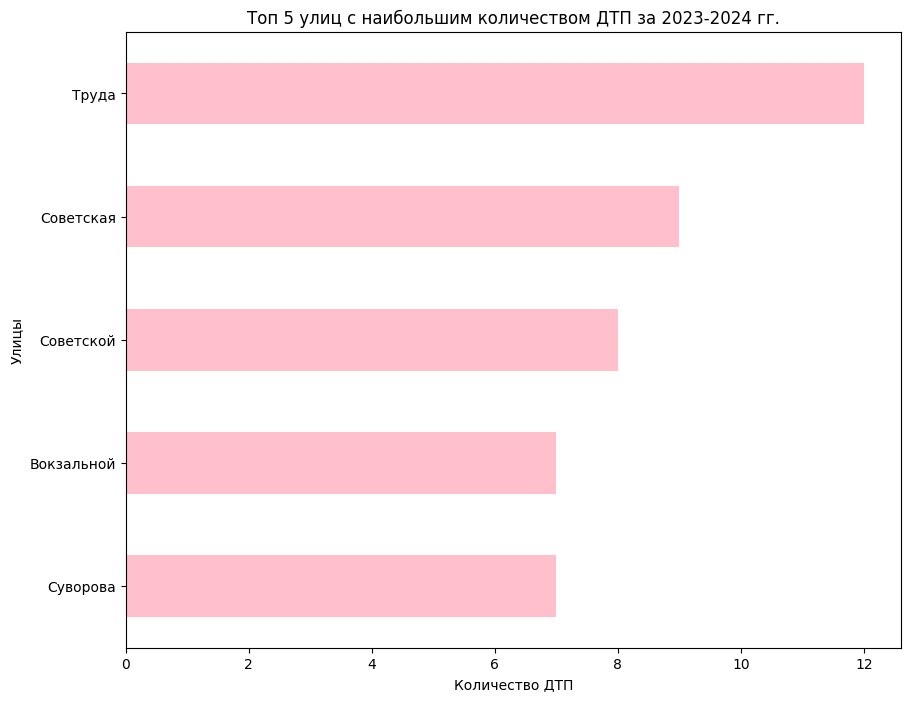

In [ ]:
import matplotlib.pyplot as plt

streets_counts = data['combined_address'].str.split(', ').str[1].str.split(' ').str[1].value_counts()

streets_counts.index = streets_counts.index.str.strip()
streets_counts.index = streets_counts.index.str.replace('ой$', 'ая')

# Выбираем топ 5 улиц с наибольшим количеством повторений
top_5_streets = streets_counts.nlargest(5)

# Сортируем в порядке убывания
top_5_streets = top_5_streets.sort_values(ascending=True)

top_5_streets.plot(kind='barh', figsize=(10, 8), color='pink')
plt.xlabel('Количество ДТП')
plt.ylabel('Улицы')
plt.title('Топ 5 улиц с наибольшим количеством ДТП за 2023-2024 гг.')
plt.show()


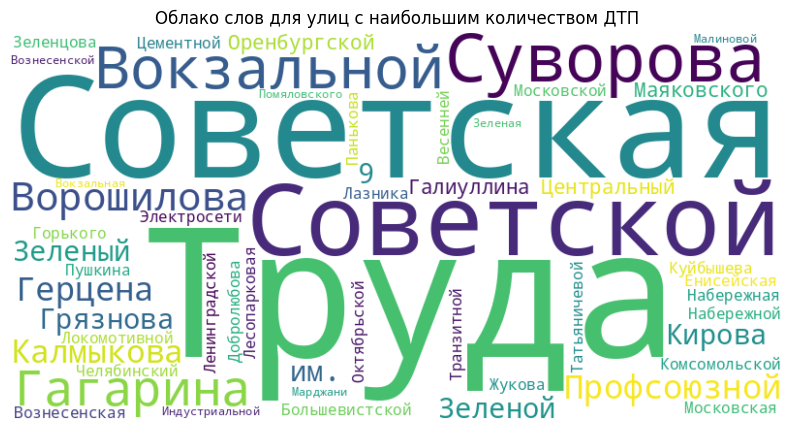

In [ ]:
from wordcloud import WordCloud

# Создание DataFrame с улицами и их количеством повторений
streets_counts = data['combined_address'].str.split(', ').str[1].str.split(' ').str[1].value_counts()
streets_counts.index = streets_counts.index.str.replace('улица ', '')

streets_counts.index = streets_counts.index.str.replace('ой$', 'ая')
# Создание облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(streets_counts)

# Отображение облака слов
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для улиц с наибольшим количеством ДТП')
plt.show()

In [ ]:
data

,post_id,date,text,likes_count,comments_count,reposts_count,views_count,combined_address
0,3467447,2024-03-29 14:45:24,👮‍♂️СЛЕДСТВЕННЫМ ОТДЕЛОМ ВОЗБУЖДЕНО УГОЛОВНОЕ ...,9,40,7,9577,"дом №37, улица Ворошилова, г. Магнитогорск, Ро..."
1,3460374,2024-03-15 13:55:00,"Доброго времени суток!\nСегодня, примерно, с 9...",68,5,13,27754,"дом 108, улица Вокзальная, г. Магнитогорск, Ро..."
5,3456700,2024-03-08 14:52:12,ВНИМАНИЕ!!! РОЗЫСК ОЧЕВИДЦЕВ ДТП! \nСотрудника...,12,0,4,12800,"дом №92, улица Советская, г. Магнитогорск, Россия"
6,3454342,2024-03-05 15:24:13,"Водитель ""Гранты"" не заметил грузовик. В резул...",48,11,31,33611,"дом №3, улица Локомотивной и, г. Магнитогорск,..."
9,3445942,2024-02-19 07:56:52,👮‍♂🚔 В МАГНИТОГОРСКЕ В ПЕРИОД С 16 ПО 18 ФЕВРА...,22,13,3,20575,"дом №97, улица Суворова, г. Магнитогорск, Россия"
...,...,...,...,...,...,...,...,...
144,3188050,2023-01-24 13:00:03,22 января в 18 часов 20 минут в районе дома 1 ...,186,72,159,72075,"дом 1, улица Панькова, г. Магнитогорск, Россия"
145,3188030,2023-01-24 11:43:44,23 января в 7 часов 30 минут в районе дома 1 п...,19,9,6,19967,"дом 1, улица Профсоюзной, г. Магнитогорск, Россия"
147,3184414,2023-01-19 04:19:23,17 января на территории города Магнитогорска з...,16,11,2,18191,"дом 6, улица Герцена, г. Магнитогорск, Россия"
148,3182578,2023-01-16 14:31:10,13 января в 08 часов 10 минут в районе дома 1 ...,17,9,3,13892,"дом 1, улица Зеленая, г. Магнитогорск, Россия"


<ipython-input-30-9ce6034986c0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
<ipython-input-30-9ce6034986c0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['date'].dt.month
<ipython-input-30-9ce6034986c0>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

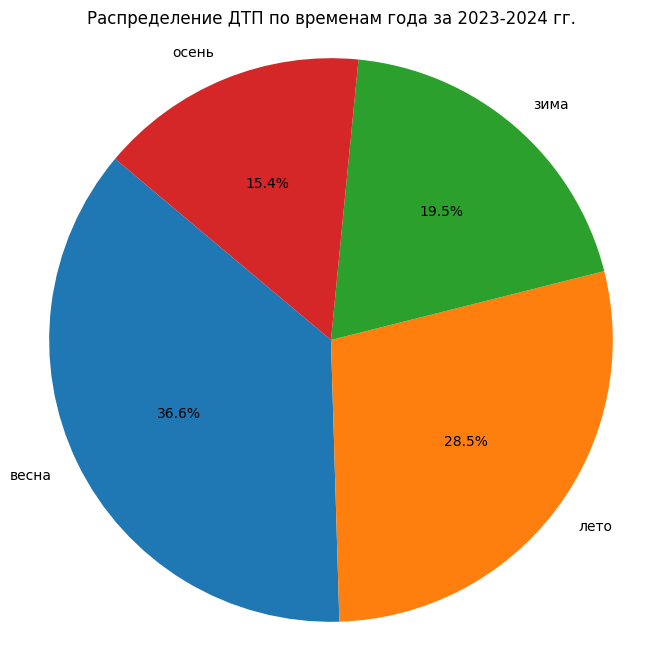

In [ ]:
# Определяем периоды времен года
def get_season(month):
    if month in [12, 1, 2]:
        return 'зима'
    elif month in [3, 4, 5]:
        return 'весна'
    elif month in [6, 7, 8]:
        return 'лето'
    else:
        return 'осень'

# Преобразуем столбец 'date' к типу datetime
data['date'] = pd.to_datetime(data['date'])

# Извлекаем месяц из даты
data['month'] = data['date'].dt.month

# Применяем функцию для определения времени года
data['season'] = data['month'].apply(get_season)

# Подсчитываем количество ДТП по временам года
accidents_by_season = data['season'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(accidents_by_season, labels=accidents_by_season.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение ДТП по временам года за 2023-2024 гг.')
plt.axis('equal')
plt.show()

<ipython-input-31-2d2caee29214>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])
<ipython-input-31-2d2caee29214>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = data['date'].dt.hour
<ipython-input-31-2d2caee29214>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

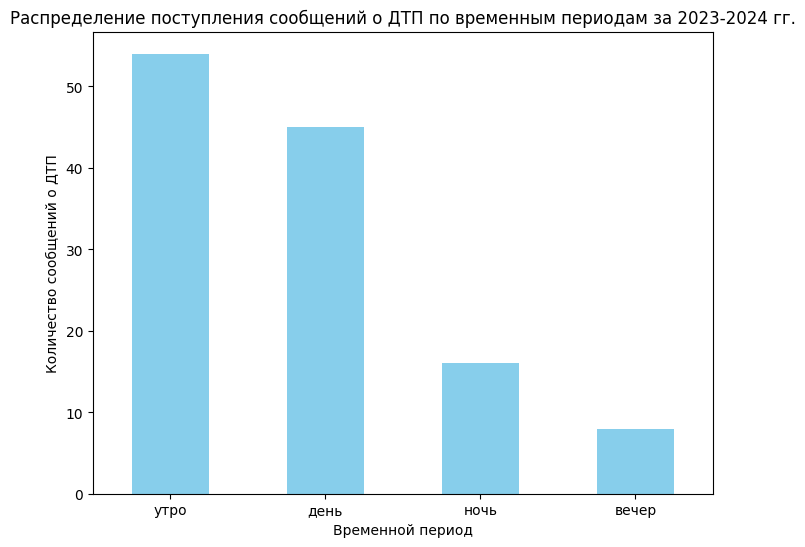

In [ ]:
# Определяем временной период для каждого ДТП
def get_time_period(hour):
    if hour >= 0 and hour < 6:
        return 'ночь'
    elif hour >= 6 and hour < 12:
        return 'утро'
    elif hour >= 12 and hour < 18:
        return 'день'
    else:
        return 'вечер'


data['date'] = pd.to_datetime(data['date'])
data['hour'] = data['date'].dt.hour

# Применяем функцию для определения временного периода
data['time_period'] = data['hour'].apply(get_time_period)

# Подсчитываем общее количество сообщений о ДТП для каждого временного периода
accidents_count_by_period = data['time_period'].value_counts()

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 6))
accidents_count_by_period.plot(kind='bar', color='skyblue')
plt.xlabel('Временной период')
plt.ylabel('Количество сообщений о ДТП')
plt.title('Распределение поступления сообщений о ДТП по временным периодам за 2023-2024 гг.')
plt.xticks(rotation=0)
plt.show()

<ipython-input-32-15858ae83449>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_engagement'] = data['likes_count'] + data['comments_count'] + data['reposts_count'] + data['views_count']


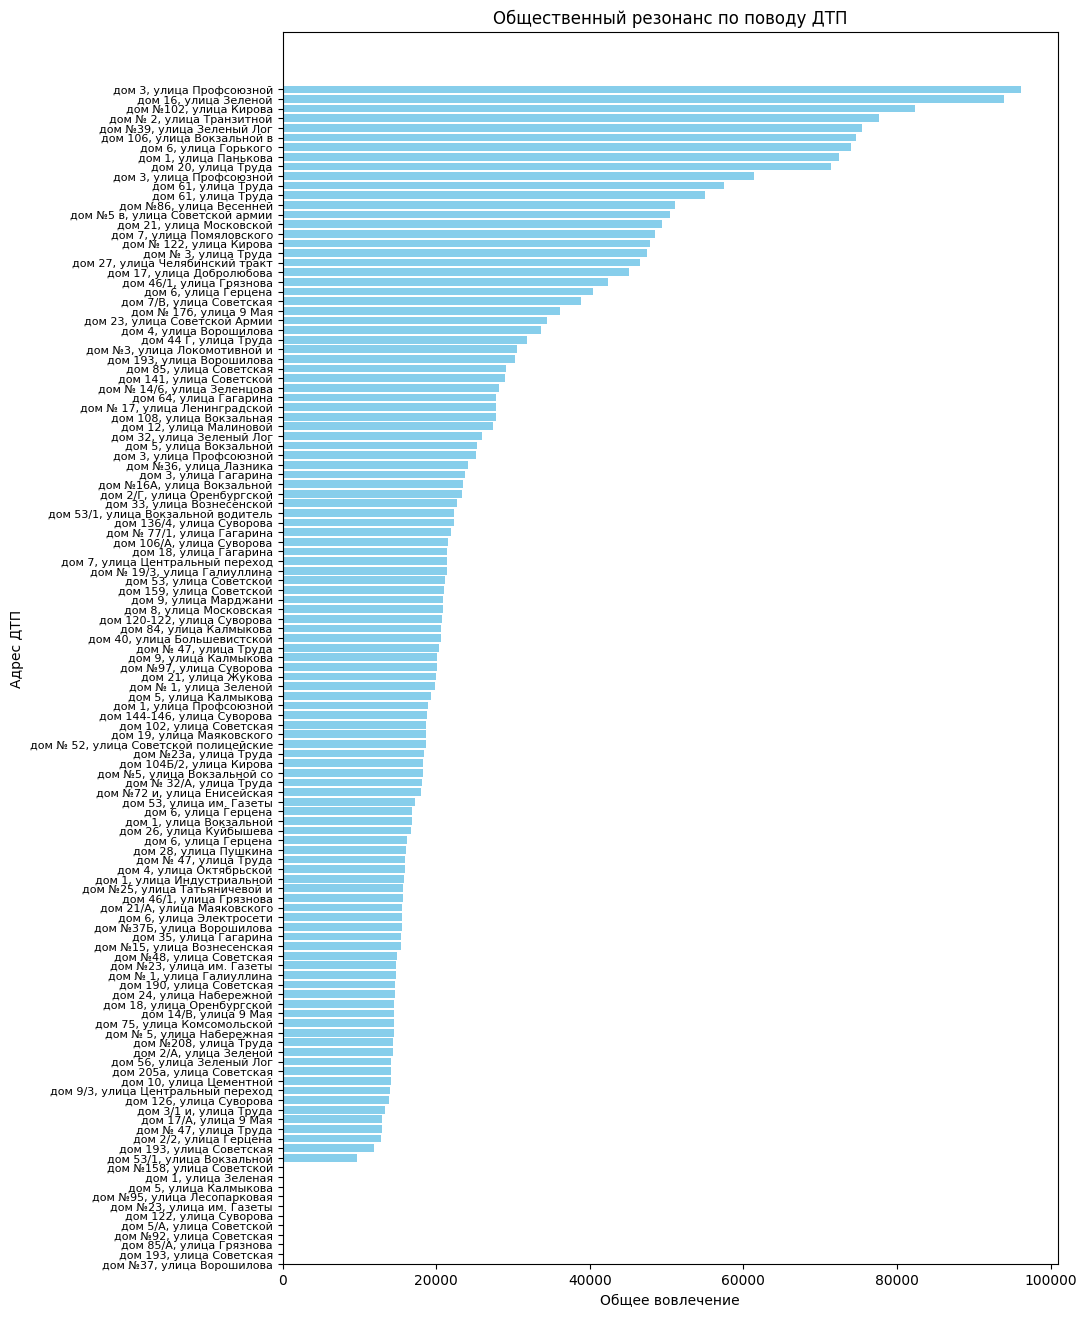

In [ ]:
# Суммируем метрики для каждого поста
data['total_engagement'] = data['likes_count'] + data['comments_count'] + data['reposts_count'] + data['views_count']

data_sorted = data.sort_values(by='total_engagement', ascending=False)
addresses_spaced = data_sorted['combined_address'].apply(lambda x: ', '.join(x.split(', ')[0:2]))

plt.figure(figsize=(10, 16))
plt.barh(addresses_spaced, data_sorted['total_engagement'], color='skyblue')
plt.xlabel('Общее вовлечение')
plt.ylabel('Адрес ДТП')
plt.title('Общественный резонанс по поводу ДТП')
plt.gca().invert_yaxis()

# Увеличиваем промежутки между адресами на оси y
plt.yticks(range(len(addresses_spaced)), addresses_spaced, fontsize=8)

plt.show()

In [ ]:
data

,post_id,date,text,likes_count,comments_count,reposts_count,views_count,combined_address,month,season,hour,time_period,total_engagement
0,3467447,2024-03-29 14:45:24,👮‍♂️СЛЕДСТВЕННЫМ ОТДЕЛОМ ВОЗБУЖДЕНО УГОЛОВНОЕ ...,9,40,7,9577,"дом №37, улица Ворошилова, г. Магнитогорск, Ро...",3,весна,14,день,9633
1,3460374,2024-03-15 13:55:00,"Доброго времени суток!\nСегодня, примерно, с 9...",68,5,13,27754,"дом 108, улица Вокзальная, г. Магнитогорск, Ро...",3,весна,13,день,27840
5,3456700,2024-03-08 14:52:12,ВНИМАНИЕ!!! РОЗЫСК ОЧЕВИДЦЕВ ДТП! \nСотрудника...,12,0,4,12800,"дом №92, улица Советская, г. Магнитогорск, Россия",3,весна,14,день,12816
6,3454342,2024-03-05 15:24:13,"Водитель ""Гранты"" не заметил грузовик. В резул...",48,11,31,33611,"дом №3, улица Локомотивной и, г. Магнитогорск,...",3,весна,15,день,33701
9,3445942,2024-02-19 07:56:52,👮‍♂🚔 В МАГНИТОГОРСКЕ В ПЕРИОД С 16 ПО 18 ФЕВРА...,22,13,3,20575,"дом №97, улица Суворова, г. Магнитогорск, Россия",2,зима,7,утро,20613
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,3188050,2023-01-24 13:00:03,22 января в 18 часов 20 минут в районе дома 1 ...,186,72,159,72075,"дом 1, улица Панькова, г. Магнитогорск, Россия",1,зима,13,день,72492
145,3188030,2023-01-24 11:43:44,23 января в 7 часов 30 минут в районе дома 1 п...,19,9,6,19967,"дом 1, улица Профсоюзной, г. Магнитогорск, Россия",1,зима,11,утро,20001
147,3184414,2023-01-19 04:19:23,17 января на территории города Магнитогорска з...,16,11,2,18191,"дом 6, улица Герцена, г. Магнитогорск, Россия",1,зима,4,ночь,18220
148,3182578,2023-01-16 14:31:10,13 января в 08 часов 10 минут в районе дома 1 ...,17,9,3,13892,"дом 1, улица Зеленая, г. Магнитогорск, Россия",1,зима,14,день,13921
